In [ ]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


df = run(
    [5], [5], [100_000], list(range(100_000, 1_000_000, 100_000)),
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
        {
            'max_runs_per_level': [10],
            'mem_segment_len': [21_000],
            'ro_lag_interval': [10_000],
            'flush_interval': [10_000],
            'hash_index': ['dict'],
            'compaction_enabled': [False],
            'replica': [None]
        },
        {
            'max_runs_per_level': [10],
            'threshold': [100_000],
            'replica': [None]
        }],
    [measure_writes, measure_recovery], {}
)


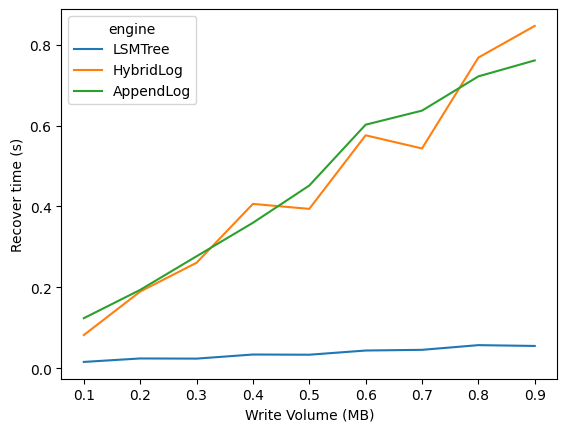


\begin{figure}[h]
    \centering
    \includegraphics[width=0.25\textwidth]{recovery.png}
    \caption{recovery.png}
    \label{fig:recovery.png}
\end{figure}



In [6]:
data = df[['metric', 'value', 'engine', 'n_ops']]
data = data[data['metric'] == 'recovery']
data['n_ops'] = data['n_ops'] / 100000

lineplot(data, 'n_ops', 'value', 'recovery',
         hue='engine',
         X='Write Volume (MB)', Y='Recover time (s)',
         save=True, show=True)